# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part B): Mini-Challenge [25%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 3 - Part A is an introduction to Object Recognition. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. This part of the Assignment is the same for all students i.e. irrespective of whether you are taking the Level 10 version (INFR10069) or the Level-11 version of the course (INFR11182 and INFR11152).

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. In the textual answer, you are given a word-count limit of 600 words: exceeding this will lead to penalisation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.


### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook (Part B), *and*
 1. The Jupyter Notebook for Part A
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers. This is especially important for the textual description and probability output (below).

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (Object Recognition) is worth 75% of the total Mark for Assignment 3, while Part B (this notebook) is worth 25%. Keep this in mind when allocating time for this assignment.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC, SVC

# Your Code goes here:

# Mini challenge

In this second part of the assignment we will have a mini object-recognition challenge. Using the same type of data as in Part A, you are asked to find the best classifier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provision that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation.

### DataSet Description

The datasets we use here are similar in composition but not the same as the ones used in Part A: *it will be useful to revise the description in that notebook*. Specifically, you have access to three new datasets: a training set (`Images_C_Train.csv`), a validation set (`Images_C_Validate.csv`), and a test set (`Images_C_Test.csv`). You must use the former two for training and evaluating your models (as you see fit). As before, the full data-set has 520 attributes (dimensions). Of these you only have access to the 500 features (`dim1` through `dim500`) to test your model on: i.e. the test set does not have any of the class labels.

### Model Evaluation

Your results will be evaluated in terms of the logarithmic loss metric, specifically the [logloss](http://scikit-learn.org/0.19/modules/model_evaluation.html#log-loss) function from SKLearn. You should familiarise yourself with this. To estimate this metric you will need to provide probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` class-labels, the method will return an `N` x `K` matrix (with rows summing to 1).

### Submission and Scoring

This part of Assignment 3 carries 25% of the total marks. Within this, you will be scored on two criteria:
 1. 80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).
 1. 20% of the mark will depend on the quality of your predictions: this will be evaluated based on the logarithmic loss metric.
Note here that just getting exceptional performance is not enough: in fact, you should focus more on analysing your results that just getting the best score!

You have to submit the following:
 1. **All Code-Cells** which show your **working** with necessary output/plots already generated.
 1. In **TEXT** cell `#ANSWER_TEXT#` you are to write your explanation (<600 words) as described above. Keep this brief and to the point. **Make sure** to keep the token `#ANSWER_TEXT#` as the first line of the cell!
 1. In **CODE** cell `#ANSWER_PROB#` you are to submit your predictions. To do this:
    1. Once you have chosen your favourite model (and pre-processing steps) apply it to the test-set and estimate the posterior proabilities for the data points in the test set.
    1. Store these probabilities in a 2D numpy array named `pred_probabilities`, with predictions along the rows i.e. each row should be a complete probability distribution over whether the image contains a person or not. Note that due to the encoding of the `is_person` class, the negative case (i.e. there is no person) comes first.
    1. Execute the `#ANSWER_PROB#` code cell, making sure to not change anything. This cell will do some checks to ensure that you are submitting the right shape of array.

You may create as many code cells as you need (within reason) for training your models, evaluating the data etc: however, the text cell `#ANSWER_TEXT#` and code-cell `#ANSWER_PROB#` showing your answers must be the last two cells in the notebook.

In [2]:
# This is where your working code should start. Fell free to add as many code-cells as necessary.
#  Make sure however that all working code cells come BEFORE the #ANSWER_TEXT# and #ANSWER_PROB#
#  cells below.

# Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Train.csv') #Getting our data
Images_C_Train = pd.read_csv(data_path, delimiter = ',')

data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Validate.csv')
Images_C_Validate = pd.read_csv(data_path, delimiter = ',')

data_path = os.path.join(os.getcwd(), 'datasets', 'Images_C_Test.csv')
Images_C_Test = pd.read_csv(data_path, delimiter = ',')

def drop_attributes(dataset):
    attributes = ["imgId", 'is_aeroplane',"is_bicycle","is_bird","is_boat","is_bottle","is_bus","is_car","is_cat","is_chair","is_cow","is_diningtable","is_dog","is_horse","is_motorbike","is_pottedplant","is_sheep","is_sofa","is_tvmonitor"]
    dataset.drop(columns = attributes, axis = 1, inplace=True) #Drop given attributes
    
drop_attributes(Images_C_Train) #Drop attributes for Training
drop_attributes(Images_C_Validate)#Drop attributes for Validation

#Sanity check
print('Number of Training instances: {}, number of Training attributes: {}'.format(Images_C_Train.shape[0], Images_C_Train.shape[1]))
print('Number of Validation instances: {}, number of Validation attributes: {}'.format(Images_C_Validate.shape[0], Images_C_Validate.shape[1]))
print('Number of Testing instances: {}, number of Testing attributes: {}'.format(Images_C_Test.shape[0], Images_C_Test.shape[1]))


Number of Training instances: 2113, number of Training attributes: 501
Number of Validation instances: 1113, number of Validation attributes: 501
Number of Testing instances: 1114, number of Testing attributes: 501


In [3]:
#Let's see the caracteristics of the dataset.
print(Images_C_Train.describe())
print(Images_C_Validate.describe())
print(Images_C_Test.describe())

# There is a huge anomaly in the maximum values for Images_C_Train. While for the validation and testing sets the maximum is 
# smaller than 0.00, in the Training there are values above 9!

              dim1         dim2         dim3         dim4         dim5  \
count  2113.000000  2113.000000  2113.000000  2113.000000  2113.000000   
mean      0.043353     0.050830     0.047988     0.037411     0.043365   
std       0.513260     0.582839     0.482166     0.464611     0.491187   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000868     0.000000     0.001359     0.000781     0.001116   
50%       0.001616     0.000340     0.003516     0.001698     0.002038   
75%       0.002404     0.001008     0.006454     0.002717     0.003125   
max       9.984000     9.122238     7.676800     9.695738     8.762671   

              dim6         dim7         dim8         dim9        dim10  \
count  2113.000000  2113.000000  2113.000000  2113.000000  2113.000000   
mean      0.049670     0.051071     0.043601     0.052698     0.054139   
std       0.558422     0.577599     0.472706     0.571629     0.588484   
min       0.000000     0.000000     0

In [4]:
#Let's fix this!

Images_C_Train = Images_C_Train[Images_C_Train.max(axis=1) < 1.1] #1.1 to not eliminate the is_person possitive (1)
Images_C_Train.describe()

# It seems that now we have eliminated the outliers and the data seems to make more sense for the max values.

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,...,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,0.001751,0.000756,0.004317,0.001853,0.002272,0.002220,0.001019,0.002446,0.002088,0.002746,...,0.000563,0.004586,0.001541,0.003642,0.002200,0.002928,0.002173,0.002485,0.002978,0.449116
std,0.001193,0.001406,0.003693,0.001340,0.001598,0.001741,0.000873,0.002910,0.001971,0.002328,...,0.001203,0.005825,0.001192,0.002657,0.001664,0.003254,0.001418,0.001997,0.002765,0.497523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000833,0.000000,0.001359,0.000756,0.001116,0.001019,0.000340,0.000625,0.000744,0.001116,...,0.000000,0.000679,0.000679,0.001698,0.001019,0.000744,0.001116,0.001019,0.001019,0.000000
50%,0.001563,0.000340,0.003397,0.001698,0.002038,0.001860,0.000744,0.001563,0.001698,0.002056,...,0.000000,0.002717,0.001359,0.003057,0.001860,0.001953,0.002038,0.002038,0.002232,0.000000
75%,0.002378,0.000893,0.006324,0.002717,0.003057,0.003057,0.001488,0.003397,0.002717,0.003736,...,0.000679,0.006454,0.002232,0.004808,0.003057,0.003780,0.002976,0.003397,0.004076,1.000000
max,0.009851,0.016644,0.027514,0.010789,0.010417,0.021739,0.005774,0.029830,0.028372,0.020380,...,0.021739,0.053329,0.010234,0.024457,0.011719,0.028125,0.008492,0.014509,0.028533,1.000000


In [5]:
#Getting X and y for Training, Validation and Testing sets.

X_tr = Images_C_Train.drop(columns = "is_person", axis = 1) #Select only the arrtibutes.
y_tr = Images_C_Train["is_person"]
print('Dimension of X_train: {}. Dimension of y_train: {}.'.format(X_tr.shape, y_tr.shape))

X_val = Images_C_Validate.drop(columns = "is_person", axis = 1)
y_val = Images_C_Validate["is_person"]
print('Dimension of X_validation: {}. Dimension of y_validation: {}.'.format(X_val.shape, y_val.shape))

X_tst = Images_C_Test.drop(columns = "is_person", axis = 1)
y_tst = Images_C_Test["is_person"]
print('Dimension of X_testing: {}. Dimension of y_testing: {}.'.format(X_tst.shape, y_tst.shape))


Dimension of X_train: (2093, 500). Dimension of y_train: (2093,).
Dimension of X_validation: (1113, 500). Dimension of y_validation: (1113,).
Dimension of X_testing: (1114, 500). Dimension of y_testing: (1114,).


In [6]:
# Transform and process the data for better results.

X_scaled = preprocessing.StandardScaler()

X_tr = X_scaled.fit_transform(X_tr) #Just fit the training set.
X_val = X_scaled.transform(X_val)
X_tst = X_scaled.transform(X_tst)


In [7]:
# First we need the baseline for our model to be compared.A DummyClassifier thath predicts all new data points to be the same
# as the prior (most frequent class).

dummy_classifier = DummyClassifier(strategy="prior").fit(X_tr, y_tr) 
pred_y = dummy_classifier.predict_proba(X_val)
print('Log Loss of the Dummy Classifier : {:.5f}'.format(log_loss(y_val,pred_y)))


Log Loss of the Dummy Classifier : 0.69294


In [8]:
#Now let's check how what is the score for a proper not naive classifier

svc_l = SVC(C=1, kernel='linear', probability=True)      
svc_l.fit(X_tr, y_tr) 
y_pred_l = svc_l.predict_proba(X_val)
print('Log Loss of the Linear classifier: {:.5f}'.
      format(log_loss(y_val,y_pred_l))) 

#Smaller log loss, therefore better prediction due to the transformation.

Log Loss of the Linear classifier: 0.63209


In [9]:
#Inicialisate all the arrays for the data we are going to obtain in the loop.
array_lnr = []
array_rbf = []
array_poly = []
array_C = []

c= 1e-5
while c < 1e1:

#Initialise all the SVM kernels
    svc_l = SVC(C=c, kernel='linear', probability=True)  
    svc_rbf = SVC(C=c,kernel='rbf', gamma='auto', probability=True) 
    svc_poly = SVC(C=c,kernel='poly',degree=2, probability=True)
    
    array_C.append(c) #Keep track of C for later.

#Testing the different kernels.    
    svc_l.fit(X_tr, y_tr) 
    y_pred_l = svc_l.predict_proba(X_val)
    print('Log Loss of the Linear classifier: {:.5f} and C: {}'.
          format(log_loss(y_val,y_pred_l), c))
    array_lnr.append(log_loss(y_val,y_pred_l))
    
    svc_rbf.fit(X_tr, y_tr)
    y_pred_rbf = svc_rbf.predict_proba(X_val)
    print('Log Loss of the RBF classifier: {:.5f} and C: {}'.
          format(log_loss(y_val,y_pred_rbf), c))
    array_rbf.append(log_loss(y_val,y_pred_rbf))

    svc_poly.fit(X_tr, y_tr) 
    y_pred_poly = svc_poly.predict_proba(X_val) 
    print('Log Loss of the Polynomical classifier: {:.5f} and C: {}\n'.
          format(log_loss(y_val,y_pred_poly), c))
    array_poly.append(log_loss(y_val,y_pred_poly))
     
    c = 10*c #Step Size


Log Loss of the Linear classifier: 0.62428 and C: 1e-05
Log Loss of the RBF classifier: 0.60315 and C: 1e-05
Log Loss of the Polynomical classifier: 1.38985 and C: 1e-05

Log Loss of the Linear classifier: 0.60083 and C: 0.0001
Log Loss of the RBF classifier: 0.60041 and C: 0.0001
Log Loss of the Polynomical classifier: 0.72725 and C: 0.0001

Log Loss of the Linear classifier: 0.58402 and C: 0.001
Log Loss of the RBF classifier: 0.60135 and C: 0.001
Log Loss of the Polynomical classifier: 0.64096 and C: 0.001

Log Loss of the Linear classifier: 0.60557 and C: 0.01
Log Loss of the RBF classifier: 0.59919 and C: 0.01
Log Loss of the Polynomical classifier: 0.64241 and C: 0.01

Log Loss of the Linear classifier: 0.62106 and C: 0.1
Log Loss of the RBF classifier: 0.57554 and C: 0.1
Log Loss of the Polynomical classifier: 0.61818 and C: 0.1

Log Loss of the Linear classifier: 0.63078 and C: 1.0
Log Loss of the RBF classifier: 0.54193 and C: 1.0
Log Loss of the Polynomical classifier: 0.5913

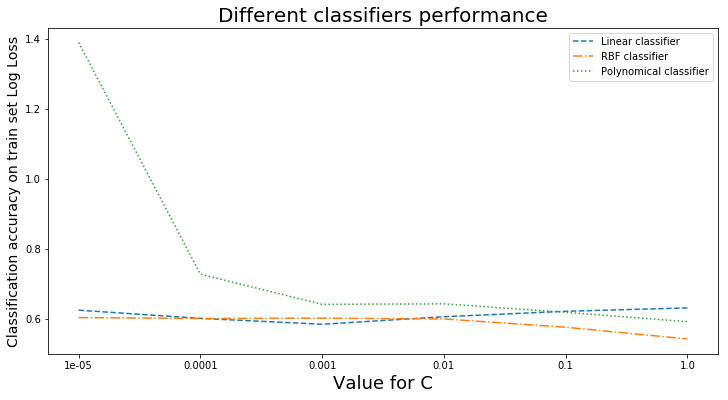

In [10]:
figure, ax = plt.subplots(figsize=(12,6))
plt.plot(array_lnr, linestyle='--', color='C0', label="Linear classifier", )
plt.plot(array_rbf, linestyle='-.', color='C1', label="RBF classifier")
plt.plot(array_poly, linestyle=':', color='C2', label="Polynomical classifier")

plt.xlabel('Value for C', fontsize=18)
plt.ylabel('Classification accuracy on train set Log Loss', fontsize=14)
plt.title('Different classifiers performance', fontsize=20)
plt.legend()
array_C2 = [0] + array_C
ax.set_xticklabels(array_C2)
plt.show()

In [62]:
#We have seen that RBF is the classifier that obtained the best results of the SVM's. So let us work on this one.

index_min = np.argmin(array_rbf) #Getting the best value

svc_rbf2 = SVC(C=array_C[index_min], kernel='rbf', gamma='auto', probability=True) #Initialise for the best C
svc_rbf2.fit(X_tr, y_tr)

y_pred_rbf2 = svc_rbf2.predict_proba(X_val)

print('Log Loss of the Polynomical classifier: {:.5f} for C = {}.'.
              format(log_loss(y_val,y_pred_rbf2), array_C[index_min]))


Log Loss of the Polynomical classifier: 0.54175 for C = 1.0.


In [49]:
#Predict finally the testing set labels.
pred_probabilities = svc_rbf2.predict_proba(X_tst)
print(pred_probabilities.shape)

(1114, 2)


#ANSWER_TEXT#

***Your answer goes here:***

80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).

* At the beginning analysing the data we saw extreme rare values in every attribute for the Training set. Because of this, and after looking at the other values in the validation and testing sets, we decided to cut all the instances that contained a value bigger than 1, to eliminate the distortion this “bad data” was producing to our predictions.
* After this I also processed the data to fit it better in the classifier, especially for SVM it is good to have it processed. But we fitted only the training examples to try not to overfit and adapt the data to the Validation or Testing sets (Only applied to those a transformation and not a fit).
* After this we computed a Dummy Classifier to have a baseline of our progress.
* For the classifier, I chose the Support Vector Machine. This is because it is one of the best classifiers in regard of image recognition, it is a powerfull method, and we have previously used it in previous labs/assignments. Also because of the different Kernels this classifier has, we can play with it to obtain the best perform.
* We tested different types of Kernels to determinate which was the best for this task, changing the parameter C (Error term). Then, selected the RBF kernel that perform the best in the training data overall C parameters and try to potentiate it a bit more with further changes. 
* We did not performed a cross validation with the data because we wanted to fit all the training data to the classifier and then all the testing (that was already split) to the prediction.
* Finally, I obtained a log loss of 0.54175 using RBF and C = 1.0, then I predicted the test probabilities using the best classifier.


In [47]:
#ANSWER_PROB#
# Run this cell when you are ready to submit your test-set probabilities. This cell will generate some
# warning messages if something is not right: make sure to address them!
if pred_probabilities.shape != (1114, 2):
    print('Array is of incorrect shape. Rectify this before submitting.')
elif (pred_probabilities.sum(axis=1) != 1.0).all():
    print('Submitted values are not correct probabilities. Rectify this before submitting.')
else:
    for _prob in pred_probabilities:
        print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))

0.77964420, 0.22035580
0.86693919, 0.13306081
0.40150013, 0.59849987
0.38524828, 0.61475172
0.79061346, 0.20938654
0.10767364, 0.89232636
0.24649760, 0.75350240
0.09143403, 0.90856597
0.86854117, 0.13145883
0.74800437, 0.25199563
0.52944345, 0.47055655
0.83051079, 0.16948921
0.60015708, 0.39984292
0.64589614, 0.35410386
0.02321797, 0.97678203
0.58409036, 0.41590964
0.05826140, 0.94173860
0.53479759, 0.46520241
0.87085420, 0.12914580
0.44544635, 0.55455365
0.86844569, 0.13155431
0.42198822, 0.57801178
0.71769721, 0.28230279
0.46194569, 0.53805431
0.75454612, 0.24545388
0.07717349, 0.92282651
0.22787173, 0.77212827
0.82320408, 0.17679592
0.33073566, 0.66926434
0.48650317, 0.51349683
0.78301126, 0.21698874
0.40060662, 0.59939338
0.88489899, 0.11510101
0.36681811, 0.63318189
0.73970398, 0.26029602
0.48888501, 0.51111499
0.19975029, 0.80024971
0.72758784, 0.27241216
0.84190667, 0.15809333
0.51100200, 0.48899800
0.77154867, 0.22845133
0.63434674, 0.36565326
0.41022698, 0.58977302
0.90122429,